In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df3.columns = df3.columns.astype(str)
X = df3.drop(['MOF Name', '0.05bar', '0.5bar', '0.9bar', '2.5bar', '4.5bar', '35bar', 'MOF ID'], axis=1)
y = df3['35bar'] #76.53
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.05, random_state=17)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=6)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

In [16]:
dataset = pd.read_excel('DATASET.xlsx', sheet_name='MergedSheet2')
dataset.columns

Index(['CSD', 'Metal Type', 'Density (g/cm3)', 'PLD', 'LCD', 'VSA  (m2/cm3)',
       'GSA (m2/g)', 'void fraction', 'pore volume (cm3/g)', 'Note',
       'Extension', '1bar_280Kelvin', '5.8bar_280Kelvin', '65bar_280Kelvin',
       '1bar_298Kelvin', '5.8bar_298Kelvin', '65bar_298Kelvin'],
      dtype='object')

In [17]:
data = dataset.drop(['CSD', 'Metal Type', 'Note', 'Extension', '1bar_280Kelvin', '5.8bar_280Kelvin', '65bar_280Kelvin', '1bar_298Kelvin', '5.8bar_298Kelvin'], axis=1)
data.columns

Index(['Density (g/cm3)', 'PLD', 'LCD', 'VSA  (m2/cm3)', 'GSA (m2/g)',
       'void fraction', 'pore volume (cm3/g)', '65bar_298Kelvin'],
      dtype='object')

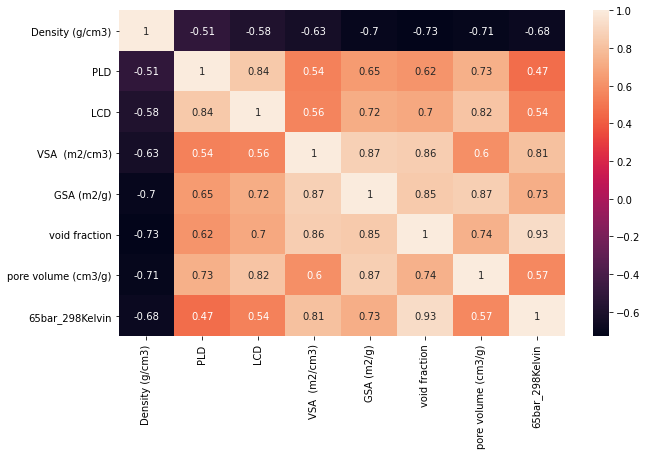

In [18]:
hmdata = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(hmdata, annot=True)
plt.show()

#values close to +/- 1 mean strong correlation, values close to 0 mean weak correlation
#all features are well correlated to each other and result, cannot perform an feature selection

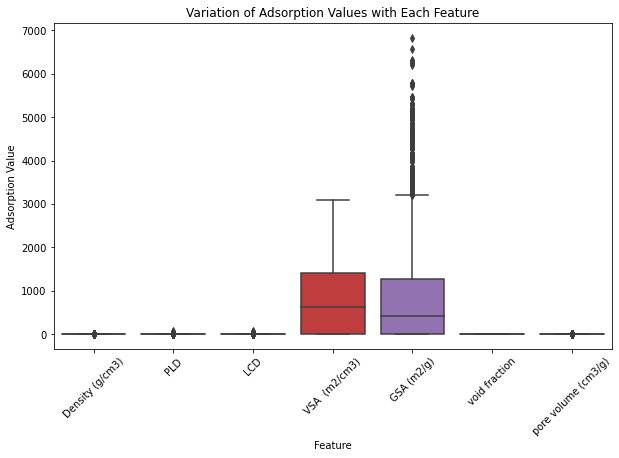

In [19]:
bpdata = data.melt(id_vars='65bar_298Kelvin', var_name='Feature')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='value', data=bpdata)
plt.xticks(rotation=45)
plt.title('Variation of Adsorption Values with Each Feature')
plt.xlabel('Feature')
plt.ylabel('Adsorption Value')
plt.show()

#points above lines aee outliers, too many of them

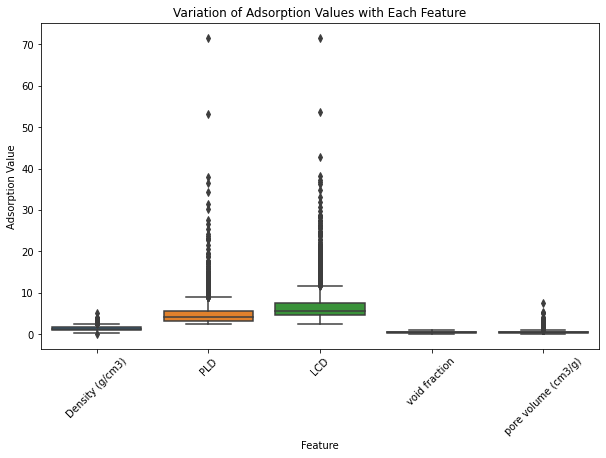

In [20]:
bp = data.drop(['VSA  (m2/cm3)', 'GSA (m2/g)'], axis=1)
bpdata = bp.melt(id_vars='65bar_298Kelvin', var_name='Feature')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='value', data=bpdata)
plt.xticks(rotation=45)
plt.title('Variation of Adsorption Values with Each Feature')
plt.xlabel('Feature')
plt.ylabel('Adsorption Value')
plt.show()

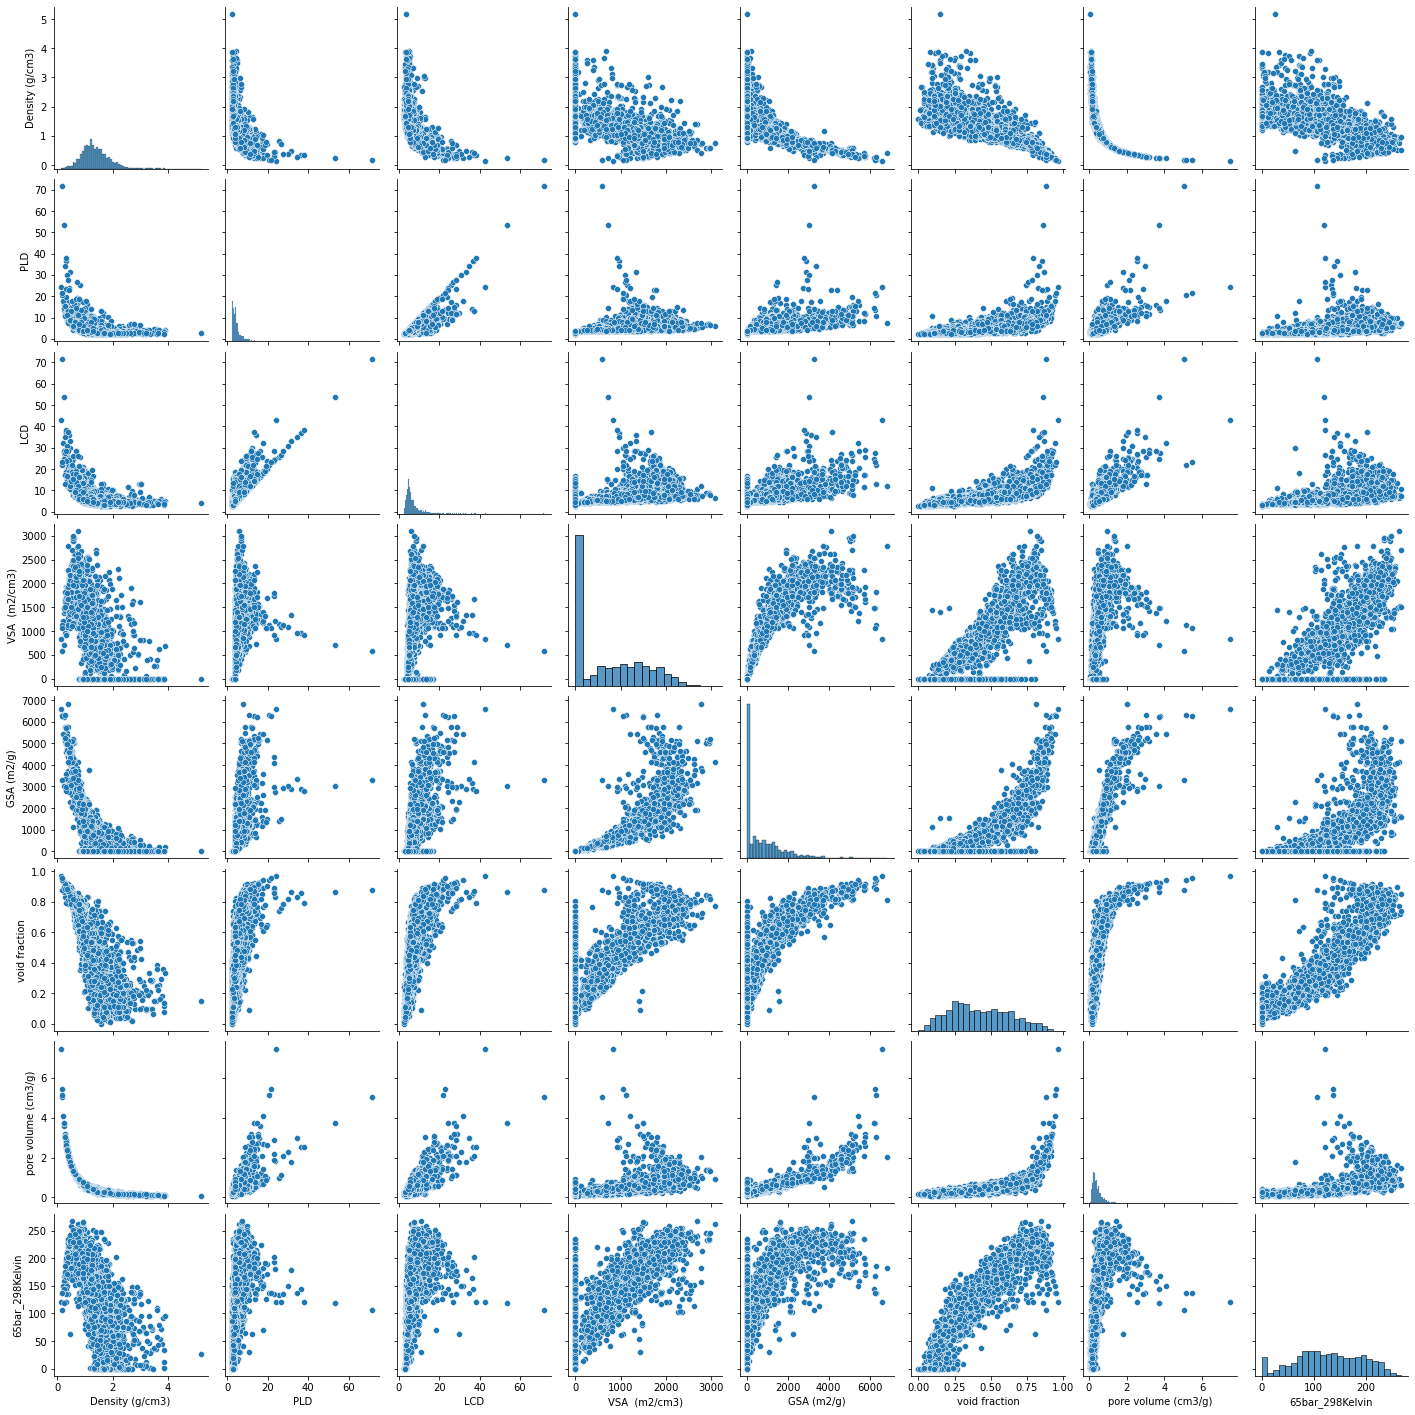

In [21]:
sns.pairplot(data)
plt.show()
None

#similar to heatmap, shows correlation between variables

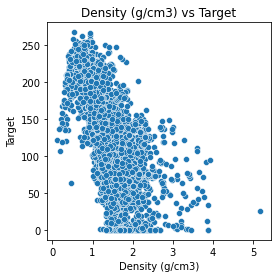

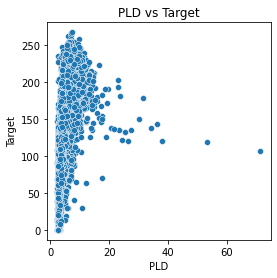

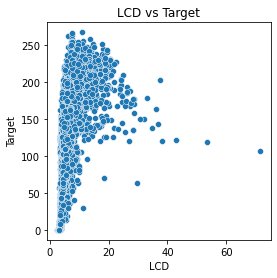

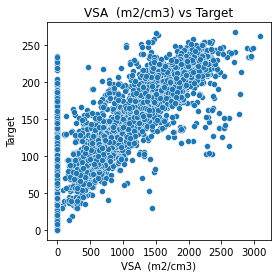

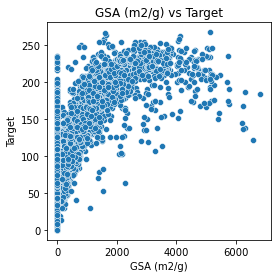

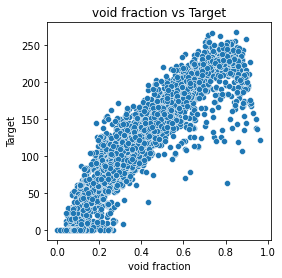

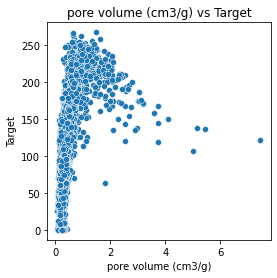

In [28]:
X_train = data.drop(['65bar_298Kelvin'], axis=1)
y_train = data['65bar_298Kelvin']
for feature in X_train.columns:
    plt.figure(figsize=(4,4))
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.title(f"{feature} vs Target")
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.show()

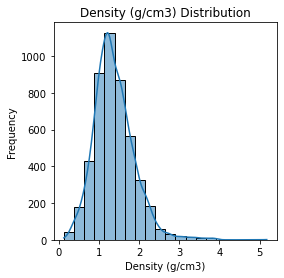

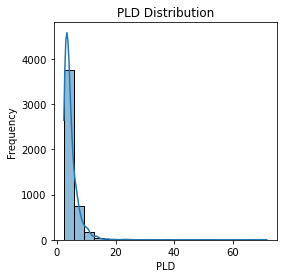

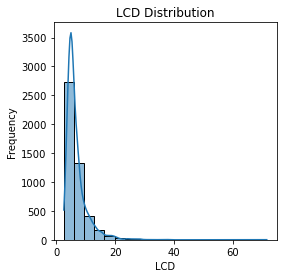

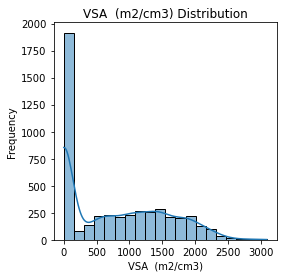

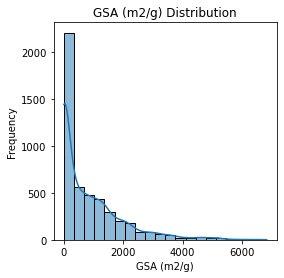

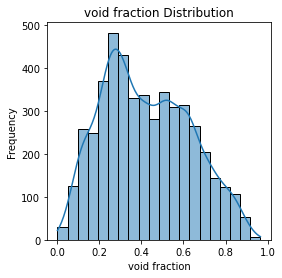

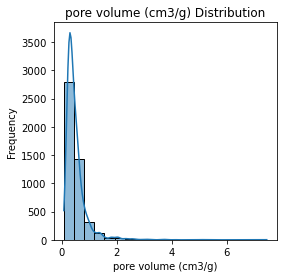

In [29]:
for feature in X_train.columns:
    plt.figure(figsize=(4,4))
    sns.histplot(X_train[feature], bins=20, kde=True)
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [24]:
zero_counts = (data == 0).sum()
print("Number of zeros in each column:")
print(zero_counts)
print(len(data))

Number of zeros in each column:
Density (g/cm3)           0
PLD                       0
LCD                       0
VSA  (m2/cm3)          1899
GSA (m2/g)             1899
void fraction             0
pore volume (cm3/g)       0
65bar_298Kelvin          26
dtype: int64
4763


In [31]:
import pandas as pd
data = pd.read_excel('DATASET.xlsx', sheet_name='MergedSheet2')
dataset = data.drop(['Note','Extension','CSD','Metal Type'], axis=1)
dataset.head()

,Density (g/cm3),PLD,LCD,VSA (m2/cm3),GSA (m2/g),void fraction,pore volume (cm3/g),1bar_280Kelvin,5.8bar_280Kelvin,65bar_280Kelvin,1bar_298Kelvin,5.8bar_298Kelvin,65bar_298Kelvin
0,1.52493,2.49720,4.45543,0.000,0.000,0.234030,0.255564,54.240850,56.028176,56.367142,51.440008,55.532628,56.302852
1,1.56594,2.44162,3.53642,0.000,0.000,0.172707,0.239596,6.818622,27.730762,74.332208,4.103456,18.817763,63.357725
2,1.15199,6.80253,11.25251,1185.300,1028.920,0.686068,0.556041,49.042482,130.543837,215.759616,34.091603,107.157157,201.699269
3,1.76082,4.14331,4.82084,646.239,367.010,0.349898,0.277374,29.566907,69.488797,109.056896,20.013711,57.182962,102.016284
4,1.78760,4.08045,4.80529,591.710,331.008,0.344895,0.270205,29.361130,68.306263,108.213874,19.709838,56.587642,101.295489


<ipython-input-32-acdf21ba9f0c>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


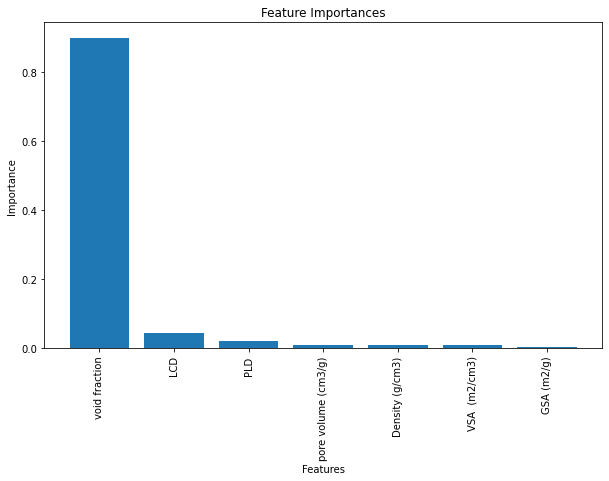

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X and y are your feature and target variables respectively
# Replace X and y with your actual data

X = dataset.drop(['1bar_298Kelvin', '5.8bar_298Kelvin', '65bar_298Kelvin', '1bar_280Kelvin', '5.8bar_280Kelvin', '65bar_280Kelvin'], axis=1)
y = dataset[['65bar_298Kelvin']]

# Initialize the scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features and target
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=19)

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(random_state=13)

# Fit the model to the training data
rfr.fit(X_train, y_train)

# Get feature importances
importances = rfr.feature_importances_

# Get feature names
feature_names = X.columns  # Assuming X_train is a DataFrame

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], tick_label=feature_names[sorted_indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


In [35]:
import numpy as np

# Print numerical values of feature importances
for feature, importance in zip(feature_names[sorted_indices], importances[sorted_indices]):
    print(f"{feature}: {importance:.4f}")

void fraction: 0.8994
LCD: 0.0441
PLD: 0.0217
pore volume (cm3/g): 0.0106
Density (g/cm3): 0.0106
VSA  (m2/cm3): 0.0099
GSA (m2/g): 0.0037
